# Physics 113: Problem Set 1
Submit notebook to Canvas by Friday, April 26, 2024 11:59 PDT

## Problem 1: Manipulating and plotting data (10 points)

### 1A: Load and Process Input Data (2 points)

Today, you'll warm up your `numpy`, `scipy`, and `matplotlib` skills by plotting a histogram of quantum physics papers posted to the arXiv (labelled as 'quant-ph') since mid-1995. The data you'll use is stored in the file `arxiv.csv`, which has been cleaned from a publicly available dataset posted by Kaggle user LOULOU.

In [1]:
import numpy as np

# Load the data, with columns containing year, month, and day
data = np.genfromtxt('data/arxiv.csv', delimiter=',', dtype=np.float64)
print(data.shape)

(72881, 3)


This array contains 72,881 rows, each corresponding to a single paper, and 3 columns, corresponding to year, month, and day. Next, use `numpy` array indexing to convert each year/month pair to a single number representing time in years:

\begin{align*}
    \mathrm{time}\ =\ \mathrm{year}\ +\ \frac{\mathrm{month}}{12}
\end{align*}
\
Store these values in an array `times`, which should have shape `(72881,)`. Because we'll be creating a histogram with a bin width of several months, we won't use the third column (days).

In [2]:
# Convert the year, month colums to a single numerical value
times = data[:,0] + (1/12)*data[:,1]

print(times.shape)

(72881,)


The data are very sparse before mid-1995. Let's use array indexing again to keep only the values in `times` that are greater than 1995.5.

---
**Tip:**
If we have an array `a`, then `(a >= 7)` is an array with the same length as `a`, with elements `True` (where the corresponding value in `a` was greater than or equal to 7) or `False` (the value in `a` was less than 7). We can then index `a` using this boolean array, and we'll get back an array which contains just the elements of `a` which are greater than or equal to 7. This method of indexing is extremely helpful when cleaning data.

In [3]:
# Extract the elements of <times> that are greater than 1995.5
# Store the result in <times>, i.e. redefine the array

filter_date = (times >= 1995.5) # (<-- your array goes here)

times = times[filter_date]

### 1B: Calculating the histogram (2 points)
Finally, you'll visualize the data using `matplotlib` and add some interpolations. First, create an array containing the edges of the bins for the histogram, running from `min(times)` to `max(times)`, with a bin width of 1/3 years (i.e. 4 months). Next, use the array you just created to calculate the centers of the bins; remember that if there are $n$ bin edges, then there are $n-1$ bin centers. You'll use these centers for plotting the histogram and calculating interpolations.

The last piece of data you'll need is the set of counts in the bins. For this, you can use `np.histogram`, which takes the data to be binned (in our case, `times`) and the bin edges (using the keyword `bins`).

---
(If you prefer, feel free to use `plt.hist` instead, being sure to store the output array which gives the counts in each bin &mdash; you'll need these values for interpolation later.)

---
`np.histogram` returns a tuple of two arrays, the first containing the counts in each bin and the second containing the bin edges. Because you don't need to store the edges again, you can ignore the second output using an underscore: `counts, _ = np.histogram(...)`.

In [4]:
# Create an array of bin edges
bin_edges = np.arange(min(times), max(times), 1/3) # (<-- your array goes here)

# Use the bin edges to create an array with the bin centers
# Note that the array of centers will be 1 element shorter than the edges array
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2 # (<-- your array goes here)

# Use np.histogram to compute the bin counts
counts, _ = np.histogram(times, bins=bin_edges)

### Plotting the histogram (2 points)
Your last task is visualizing the data you've computed. If you used `np.hist` above (rather than `plt.hist`), you can plot the histogram itself using `plt.step`, with the bin centers as your $x$ values and the counts as your $y$ values. The function `plt.step` takes a keyword `where`, which in this case can be set to `'mid'` to make the steps occur halfway between adjacent bin center values.

---

(If you want to, you can try shading the area under the histogram using `plt.fill_between`, which takes a similar keyword `step='mid'` to shade the area as a step function rather than a curve.) 

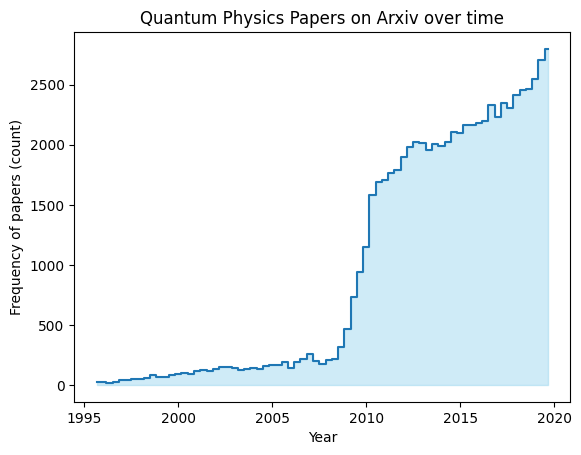

In [5]:
import matplotlib.pyplot as plt

# plot the histogram
plt.step(bin_centers, counts, where='mid')

# fill in the histogram
plt.fill_between(bin_centers, counts, color='skyblue', alpha=0.4, step='mid')

plt.xlabel('Year')
plt.ylabel('Frequency of papers (count)')
plt.title('Quantum Physics Papers on Arxiv over time')

# Show plot
plt.show()

### 1D: Making interpolations (3 points)
Finally (for real this time), you'll plot the following three interpolations over the histogram, using your `bin_centers` and `counts` as your $x$ and $y$ values. `scipy.interp1d` and `scipy.CubicSpline` make interpolating easy; browse the documentation to see what's possible.

Here are the interpolations to plot:

1) quadratic, interpolating between every $2^\mathrm{nd}$ point
2) quadratic, interpolating between every $5^\mathrm{th}$ point
3) cubic spline, interpolating between every $4^\mathrm{th}$ point

Your code goes in the cell below.

---

**Some tips:**

- To grab every $n^{\mathrm{th}}$ point from an array, `numpy` indexing comes in handy again. For an array `a`, indexing with `x[start:stop:step]` returns the elements from indices `start` to `stop` (as usual, not including the upper endpoint), taking only every `step`$^{\mathrm{th}}$ element.

- If `scipy` protests because you've tried to plot a curve beyond the bounds of the data you used to create the interpolation, the keyword `fill_value='extrapolate'` will tell the interpolation to predict values outside the original domain. If any of your curves do end up extending beyond the ends of the histogram, note whether they look like they're doing a realistic job of extrapolating.

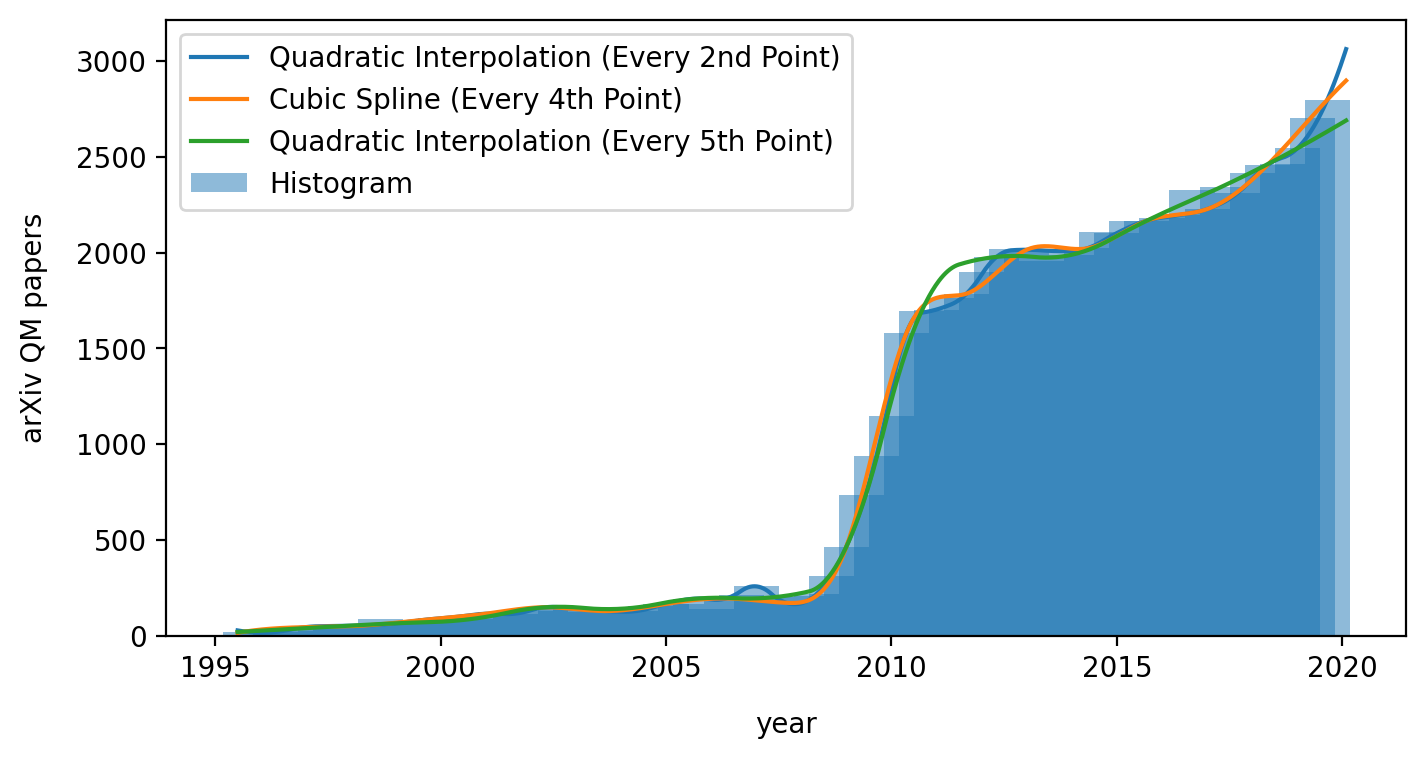

In [6]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline

# Quadratic interpolation of every 2nd data point:
quadratic_interp_2nd = interp1d(bin_centers[::2], counts[::2], kind='quadratic', fill_value='extrapolate')

# Cubic spline interpolation of every 4th data point
cubic_spline_interp_4th = CubicSpline(bin_centers[::4], counts[::4])

# Quadratic interpolation of every 5th data point:
quadratic_interp_5th = interp1d(bin_centers[::5], counts[::5], kind='quadratic', fill_value='extrapolate')

# Create a dense set of x values for plotting the interpolations
xnew = np.linspace(min(times), max(times), 1000, endpoint=True)

fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=200)

# Plot the histogram and the interpolations
ax.bar(bin_centers, counts, width=1, alpha=0.5, label='Histogram')
ax.plot(xnew, quadratic_interp_2nd(xnew), label='Quadratic Interpolation (Every 2nd Point)')
ax.plot(xnew, cubic_spline_interp_4th(xnew), label='Cubic Spline (Every 4th Point)')
ax.plot(xnew, quadratic_interp_5th(xnew), label='Quadratic Interpolation (Every 5th Point)')

ax.set_xlabel('year', labelpad=10)
ax.set_ylabel('arXiv QM papers', labelpad=10)
ax.set_ylim([0, None])
ax.legend()
plt.show()

### 1E: Assessing the interpolations: (1 point)

Looking at the curves, which of the interpolations, if any, might be overfitting the histogram?

Which interpolation do you think would do the best job of predicting the numbers of quant-ph papers submitted over the next few years beyond the end of the plot?

---
Looking at the curves, the orange curve (cubic spline with every 4th point) might be overfitting the histogram, as it follows almost every contour of the histogram's shape. Instead, we would rather have a line like the quadratic interpolation with every 5th point that follows the contour but also isn't as tight to the shape, hence doesn't overfit as much.

Going forward, I would use the orange or probably the green graph as they seem to be conservative estimates of the future of QM research. I might also consider using an average of the two lines because that would provide a more reasonable estimate. 

## Problem 2: Visualizing Differential Equations with Direction Fields (10 points)

A general 1st order ordinary differential equation is given by:

\begin{align*}
\frac{dy}{dx}=f(x, y)
\end{align*}
A direction field for the differential equation is a collection of arrows in the (x, y) plane where the slope of the line segment at a point $(x_0, y_0)$ equals the derivative at that point $f(x_0, y_0)$. Starting from an intial point and drawing curves along arrows of a direction field allow us to conveniently visualize the solutions to a differential equation. Here you will further practice your plotting skills and build intuition with differential equations by making direction field plots.

### 2A: Making a grid in the x-y plane (2 point)

Use `np.meshgrid`, make a grid of data points with x and y between -5 and 5 in steps of 1.

In [7]:
## make x-y data grid
x = np.linspace(-5, 5, 11)
y = np.linspace(-5, 5, 11)
xarr, yarr = np.meshgrid(x, y)

### 2B: Compute the arrow vectors for a given differential equation (2 points)
Given the differential equation $\frac{dy}{dx}=x-y$, compute the arrow vectors at each x-y grid point. Normalize the vectors so that they all have the same length. 

In [8]:
## Compute arrow vectors at each grid point
dy = xarr - yarr
dx = np.ones(dy.shape)

dy_norm = dy/np.sqrt(dy**2 + dx**2)
dx_norm = dx/np.sqrt(dy**2 + dx**2)

### 2C: Plot the direction field (2 points)
Use `plt.quiver`, make a direction field plot with the x-y grid and normalized arrow vectors you just computed.

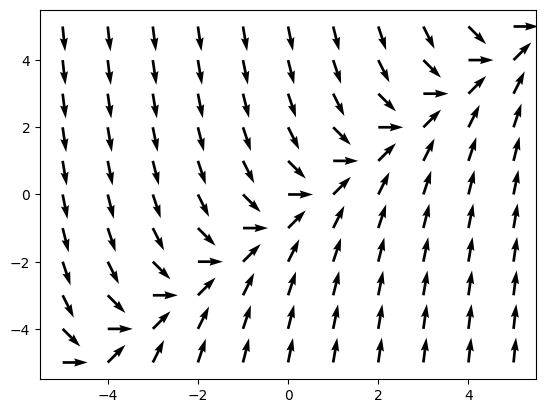

In [9]:
## Plot the direction field with quiver
plt.quiver(xarr, yarr, dx_norm, dy_norm) # your code goes here
plt.show()

### 2D: Repeat the process for a different differential equation (2 points)
Choose your favorite differential equation and visualize its direction field using the procedure you just learned.

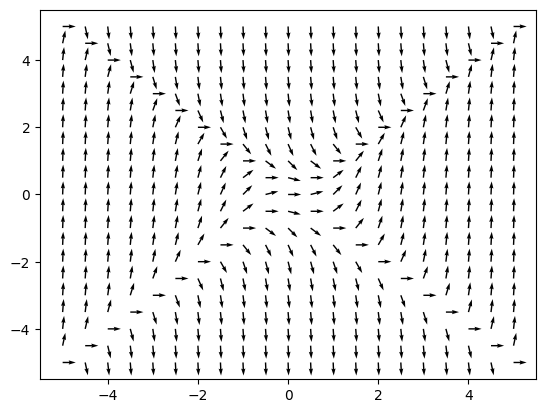

In [10]:
## make x-y data grid
x = np.linspace(-5, 5, 21)
y = np.linspace(-5, 5, 21)
xarr, yarr = np.meshgrid(x, y)

# define differntial equation
dy = xarr**2 - yarr**2
dx = np.ones(dy.shape)

# normalize vectors
dy_norm = dy/np.sqrt(dy**2 + dx**2)
dx_norm = dx/np.sqrt(dy**2 + dx**2)

# plot field
plt.quiver(xarr, yarr, dx_norm, dy_norm) # your code goes here
plt.show()

### 2E: Comment on your results (2 points)
Recall your investigation of Euler's method. Comment in detail on what a solution to your ODE using Euler's equation would look like plotted in your direction field. 

Starting at a point like (0,0), using Euler's method, we would effectively follow the arrows in short line segments, reconsidering our direction at the end of every time segement. The length of the arrows would be a factor of the delta t that we use and the path would depend on the starting point.

(0, 0) would evolve up and towards the right along the y = x diagonal.

## Problem 3: Euler's method and the harmonic oscillator (10 points)

In class so far, we have applied Euler's method to solve several first-order ODEs. Many times in physics, we are presented instead with a second-order ODE. Consider for example the equation of motion for a simple harmonic oscillator (e.g., a mass on a spring in the absence of friction or other dissipative forces):

$$ \frac{d^2x}{dt^2} = - A x $$

where $A$ is a constant (whose physical meaning you know for the mass on a spring problem). 

### 3A: Setting up the problem (2 points)

How can we apply Euler's method to this? First, we'll need to rewrite it into two first-order differential equations. Do that below.

---
$$ \frac{dv}{dt} = - A x $$
$$ \frac{dx}{dt} = v $$


*Tip*: in addition to $x$, introduce a variable $v$ that represents the velocity of your mass.

Write each of your equations in the finite difference form we learned when we talked about Euler's method, i.e., write the expressions for $x$ and $v$ at timestep $k + 1$. (Look back at the NumericalBasics notebook for guidance). 

For $x_{k+1}$, we can calculate it via the derivative understood before. 

$$ x_{k+1}(t+ \Delta t) = x_k + v_k \Delta t $$

For $v_{k+1}$, we can once again plug in the known derivative. 

$$ v_{k+1}(t+ \Delta t) = v_k + - A x_k \Delta t $$

<!-- $$ x(t+ \Delta t) = x_k + f(x_k) \Delta t $$
where $f(x_k) = \frac{dx}{dt}(x_k)$ -->

### 3B: Solving the harmonic oscillator (2 points)

Use Euler's method to solve for the position ($x$) of your mass as a function of time. Set $A = 1$, and use the initial conditions $x = 0.2$ and $v = 0$ at $t=0$. Start with a timestep $\Delta t = 0.1$ and integrate until at least $t = 50$. Save the positions and velocities as numpy arrays.

In [11]:
A_constant, delta_t, t_max = 1, 0.1, 50 # specified parameters
x, v, t = 0.2, 0, 0 # initial conditions

# initialize position and velocity arrays
positions = np.array([])
velocities = np.array([])

while t < t_max: 
    # record position and veloicity
    positions = np.append(positions, x)
    velocities = np.append(velocities, v)

    # do updates
    x_new = x + v*delta_t
    v_new = v - A_constant*x*delta_t

    x, v, t = x_new, v_new, t + delta_t


### 3C: Plotting the harmonic oscillator (2 points)

Plot the position of your mass as a function of time. As usual, the first step before plotting should be to think about what you expect the plot to look like!

We expect this graph to have two oscillating waves. The position graph should start at 0.2 and oscillate, while the velocity graph trails it and starts at 0. They should have a constant amplitude and regularly oscillating periods. 

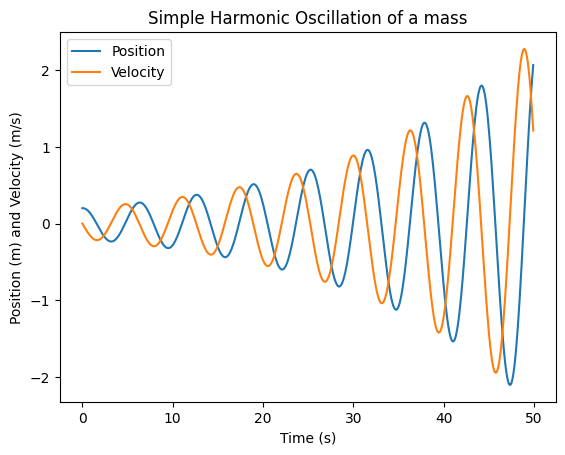

In [12]:
times = np.arange(0, t_max, delta_t)

plt.plot(times, positions, label="Position")
plt.plot(times, velocities, label="Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Position (m) and Velocity (m/s)")
plt.title("Simple Harmonic Oscillation of a mass")
plt.legend()
plt.show()

### 3D: The total energy of the harmonic oscillator (2 points)

Plot the total energy of the harmonic oscillator as a function of time. Comment on both this plot and your plot of the position as a function of time. Repeat your calculations for different timesteps and comment on the results.

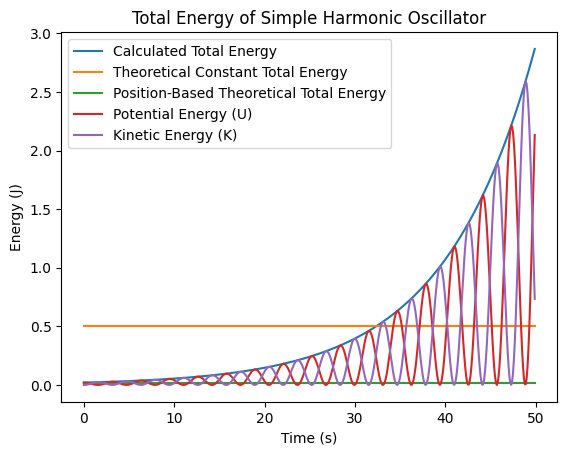

In [13]:
m, k = 1, 1 # initialize mass = 1 kg, spring constant = 1 (N/m)

# types of energy to display
total_energy = 0.5*m*velocities**2 + 0.5*k*positions**2
const_total_energy = np.linspace(0.5*k*A_constant**2, 0.5*k*A_constant**2, len(times)) # Based on E = 0.5kA^2
const_total_energy2 = np.linspace(0.5*k*0.2**2, 0.5*k*0.2**2, len(times)) # Based on E = U0 = 0.5k(x0)^2
potential = 0.5*k*positions**2
kinetic = 0.5*m*velocities**2

# display energy plots
plt.plot(times, total_energy, label="Calculated Total Energy")
plt.plot(times, const_total_energy, label="Theoretical Constant Total Energy")
plt.plot(times, const_total_energy2, label="Position-Based Theoretical Total Energy")
plt.plot(times, potential, label="Potential Energy (U)")
plt.plot(times, kinetic, label="Kinetic Energy (K)")

# format plot
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.title("Total Energy of Simple Harmonic Oscillator")
plt.legend()
plt.show()

### 3E: The Euler-Cromer Method (2 points)
Evidently, Euler's method is not conserving energy for this problem. As discussed in class, Euler's method is not accurate enough for many problems of interest. Soon we will discuss higher-order solvers that are necessary for some classes of problems. For the harmonic oscillator, let's try a minor modification called the Euler-Cromer method.

In the Euler-Cromer method, for each timestep $k$,
$$ v_{k + 1} = v_k - A x_k \Delta t $$
$$ x_{k + 1} = x_k + v_{k + 1} \Delta t $$

Note that this differs from the standard Euler method only in a single term. What is it?


This uses the future velocity to update the position step, instead of using the current velocity. This makes sense because we want to consider the velocity after the velocity update. 

Re-solve the harmonic oscillator problem using the Euler-Cromer method. Compare your solution to what you got with Euler's method and discuss. 

In [14]:
A_constant, delta_t, t_max, m, k = 1, 0.1, 50, 1, 1 # specified parameters
x, v, t = 0.2, 0, 0 # initial conditions

# initialize position and velocity arrays
positions = np.array([])
velocities = np.array([])

while t < t_max: 
    # record position and veloicity
    positions = np.append(positions, x)
    velocities = np.append(velocities, v)

    # conduct updates
    v = v - A_constant*x*delta_t
    x = x + v*delta_t

    t += delta_t


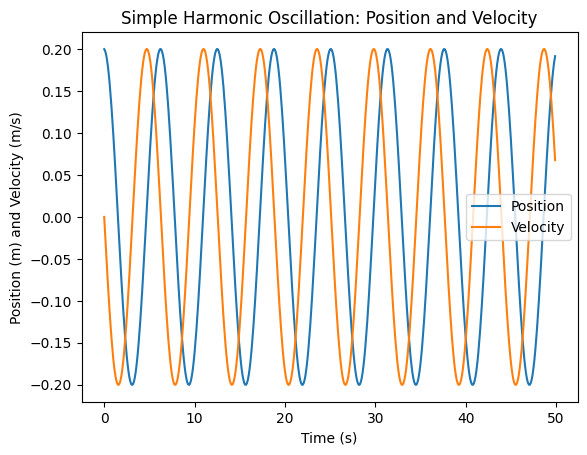

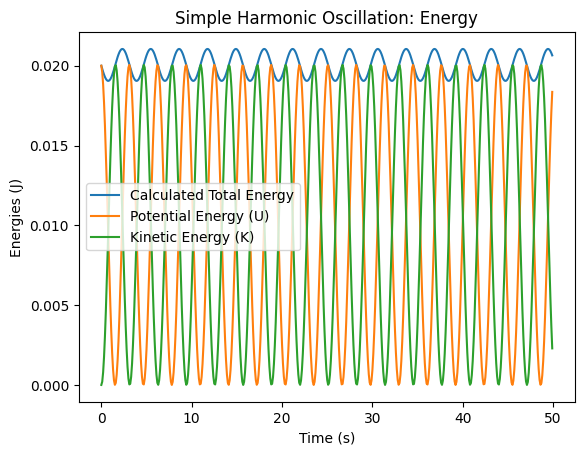

In [15]:
times = np.arange(0, t_max, delta_t)

# Energy Calculations
total_energy = 0.5*m*velocities**2 + 0.5*k*positions**2
potential = 0.5*k*positions**2
kinetic = 0.5*m*velocities**2

# position and velocity plots
plt.plot(times, positions, label="Position")
plt.plot(times, velocities, label="Velocity")

plt.xlabel("Time (s)")
plt.ylabel("Position (m) and Velocity (m/s)")
plt.title("Simple Harmonic Oscillation: Position and Velocity")
plt.legend()
plt.show()

# Energy Plots
plt.plot(times, total_energy, label="Calculated Total Energy")
plt.plot(times, potential, label="Potential Energy (U)")
plt.plot(times, kinetic, label="Kinetic Energy (K)")

plt.xlabel("Time (s)")
plt.ylabel("Energies (J)")
plt.title("Simple Harmonic Oscillation: Energy")
plt.legend()
plt.show()

This solution makes considerably more sense physically. Compared to what we got only considering the standard Euler's method, we know this doesn't overestimate the position and velocity at each step. 

However, this solution isn't completely correct because we can tell the total energy still oscillates, indicating we aren't conserving energy. This model doesn't accurately model a constant total energy. We might consider in the limit of a much smaller delta t this oscillation might be reduced, or be varying other parameters.  

## Problem 4: Revisiting the Differential Equation from Problem 2 (10 points)
Problem 2 investigates the differential equation $\frac{dy}{dx} = x - y$ via direction fields. Now, we solve this differential equation numerically. To do this, we use the SciPy function `solve_ivp`. (IVP stands for "initial value problem", a <a target="_blank" rel="noopener noreferrer" href="https://en.wikipedia.org/wiki/Initial_value_problem">type</a> of differential equation.)

A major part of computational methods is reading documentation pages. Refer to <a target="_blank" rel="noopener noreferrer" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">the solve_ivp documentation</a> throughout this problem.

### 4A: Basic usage of `solve_ivp` (2 points)
The documentation page indicates that the only required arguments to `solve_ivp` are `fun`, `t_span`, and `y0`. We will want to investigate many values of `y0`, so we wrap them in a list.


*   Define `dy_dx` intending it to be used as `fun`, referring to the documentation for what it should be.
*   Define `x_span` so that the range of $x$ is from $-2$ to $5$.
*   Define the list of `y0` values to include the following: $-4$, $-3.5$, $-2.5$, $-2$, $-1$, $1$, $4$.

Once you have done this, run `solve_ivp` with each of these `y0` values. Take care to handle `y0` properly; refer to the documentation for details. The skeleton code below extracts the relevant outputs and puts them into lists; again, refer to the documentation for the full output format if you are curious.



In [16]:
from scipy import integrate

def dy_dx(x, y): return (x - y) # define function

# define relevant parameters and initialize lists
x_span = (-2, 5)
y0_lst = [-4, -3.5, -2.5, -2, -1, 1, 4]
x_lst = []
y_lst = []

for y0 in y0_lst:
    # solve the ivp for various starting points
    sol = integrate.solve_ivp(dy_dx, x_span, [y0])
    x_lst.append(sol.t)
    y_lst.append(sol.y[0])

### 4B: Plotting the output (2 points)
Plot each of the x, y pairs from the above run.

The code below illustrates usage of the useful Python builtin function `zip()`.

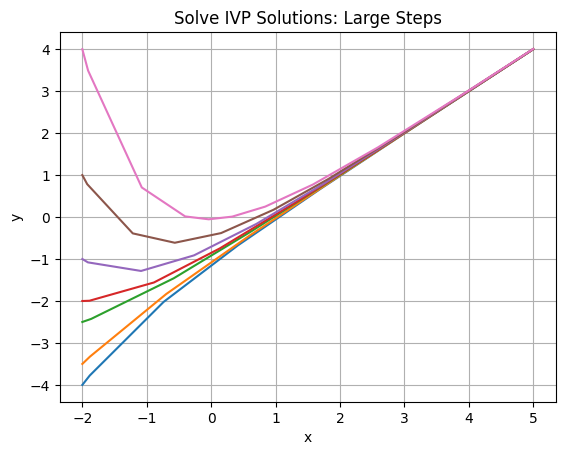

In [17]:
for x, y in zip(x_lst, y_lst):
    plt.plot(x, y)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solve IVP Solutions: Large Steps")
plt.show()

### 4C: Digging deeper into `solve_ivp` (3 points)
The plot in 4B looks choppy. Reading into the documentation, we see that there is a named argument `t_eval` that determines the input values where the solution is returned.

*   Define a variable `x_eval` that contains $100$ evenly-spaced points over the `x_span` interval we used in 4A, then re-solve the equation with this passed in for the `t_eval` argument.
*   Re-plot the data. It should be much less choppy.



In [18]:
# define a new dense set of x values
x_eval = np.linspace(-2, 5, 100)
x_lst = []
y_lst = []

for y0 in y0_lst:
    # solve ivp for each starting position
    sol = integrate.solve_ivp(dy_dx, (-2, 5), [y0], t_eval=x_eval)
    x_lst.append(sol.t)
    y_lst.append(sol.y[0])

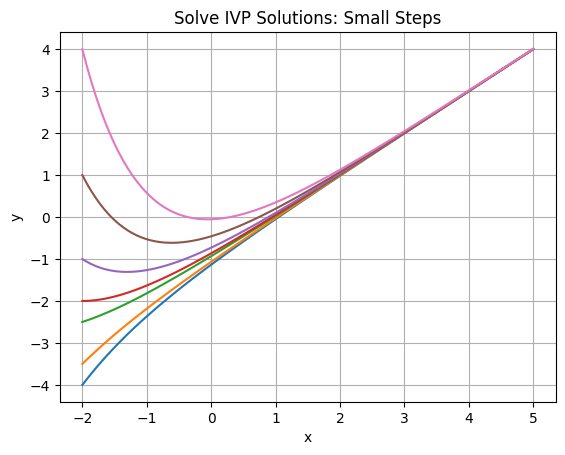

In [19]:
for x, y in zip(x_lst, y_lst):
    plt.plot(x, y)

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solve IVP Solutions: Small Steps")
plt.show()

### 4D: Investigating the solution (3 points)
The curves in 4C all appear to converge to a unified curve, suggesting that for $x$ well above the initial $x_0$, the initial value does not matter! We subtract this off and investigate the convergence.


*   State the limiting function $y_\text{lim}(x)$ for $x$ much greater than the initially specified $x_0$.
*   Plot the residual $y(x) - y_\text{lim}(x)$.
*   Re-plot the residual using a symmetrical logarithmic scale, which can better handle separation of scales between the large and small residuals. Refer to <a target="_blank" rel="noopener noreferrer" href="https://matplotlib.org/stable/api/scale_api.html#matplotlib.scale.SymmetricalLogScale">the documentation</a> for details on getting a cleaner plot.



$y_\text{lim}(x) = x-1$ for $x \gg x_o$

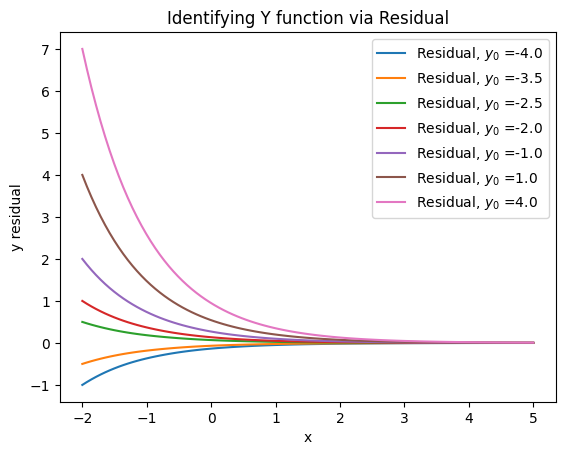

In [20]:
for x, y in zip(x_lst, y_lst):
    y_resid = y - (x - 1)
    label = ('Residual, $y_0$ =' + str(y[0]))
    plt.plot(x, y_resid, label=label)

plt.xlabel('x')
plt.ylabel('y residual')
plt.title("Identifying Y function via Residual")
plt.legend()
plt.show()

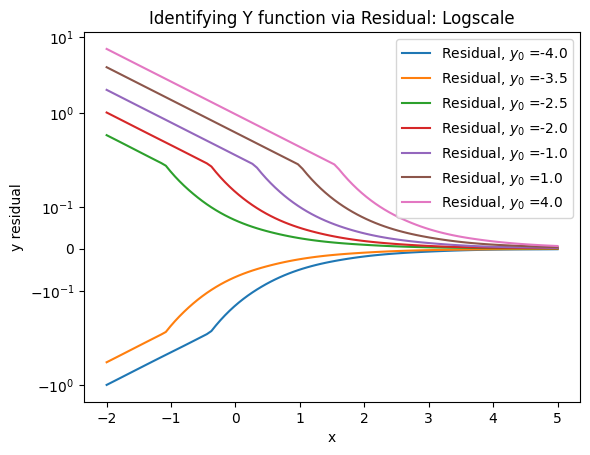

In [21]:
for x, y in zip(x_lst, y_lst):
    y_resid = y - (x - 1)
    label = ('Residual, $y_0$ =' + str(y[0]))
    plt.plot(x, y_resid, label=label)

plt.yscale('symlog', linthresh=0.2)  # Your code here; refer to the documentation
plt.xlabel('x')
plt.ylabel('y residual')
plt.title("Identifying Y function via Residual: Logscale")
plt.legend()
plt.show()

### 4E Optional challenge tasks (just for fun)
There are many more things we can do starting from this problem. No extra credit will be given, but these are all things a numerical physicist would consider.


*   The differential equation has an exact solution, unlike most that you would encounter in a real-life situation. State this solution.
*   Does the exact solution align with the investigation in 4D?
*   How good is the solver? When it gave the choppy figure in 4B, it would have been reasonable to guess that the solution was not too accurate. But by how much? Investigate the residuals between the solutions found in 4A/4C and the exact solution.
*   How efficient is the solver? Read up on the other arguments for `solve_ivp`, particularly the `method` argument, and try other solving methods. Investigate their accuracy and investigate their runtimes (you may find it useful to import `time`).
*   Can we better visualize our data? The initial values were ordered low to high, while the default plotting function cycles through a pre-defined set of colors (blue, orange, green, etc.). Use `matplotlib`'s `ColorMap` functionality to impose a uniform colorscheme on the different lines plotted in 4B and 4D.



1. We can solve this by decomposing this to the exact solution. 

$$ \frac{dy}{dx} = x - y \rightarrow y = \frac{1}{2}x^2 - xy \rightarrow y + xy = \frac{1}{2}x^2 \rightarrow \boxed{y = \frac{0.5 x^2}{1+x}} $$
2. This roughly makes sense because we can tell the limit behavior matches up. 
$$ \lim_{x\to\infty} x - 1 = \lim_{x\to\infty} \frac{0.5 x^2}{1+x} = x $$

3. ...